## **Data Analysis**

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.model_selection import train_test_split #to split the data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
original_data = pd.read_excel('/content/Book3.xlsx')

In [75]:
data= original_data.copy()

In [76]:
data.head()

,fueltype,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price
0,gas,two,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,13495.0
1,gas,two,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,16500.0
2,gas,two,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,16500.0
3,gas,four,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,13950.0
4,gas,four,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,17450.0


In [77]:
data.shape

(205, 17)

In [78]:
# Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   doornumber        205 non-null    object 
 2   carbody           205 non-null    object 
 3   wheelbase         205 non-null    float64
 4   carlength         205 non-null    float64
 5   carwidth          205 non-null    float64
 6   carheight         205 non-null    float64
 7   curbweight        205 non-null    int64  
 8   enginetype        205 non-null    object 
 9   cylindernumber    205 non-null    object 
 10  enginesize        205 non-null    int64  
 11  boreratio         205 non-null    float64
 12  stroke            205 non-null    float64
 13  compressionratio  205 non-null    float64
 14  horsepower        205 non-null    int64  
 15  peakrpm           205 non-null    int64  
 16  price             205 non-null    float64
dt

In [79]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,45400.000000


In [80]:
data.isnull().sum()

,0
fueltype,0
doornumber,0
carbody,0
wheelbase,0
carlength,0
carwidth,0
carheight,0
curbweight,0
enginetype,0
cylindernumber,0


In [81]:
# Shows data types for each column
data.dtypes

,0
fueltype,object
doornumber,object
carbody,object
wheelbase,float64
carlength,float64
carwidth,float64
carheight,float64
curbweight,int64
enginetype,object
cylindernumber,object


In [82]:
# List of categorical columns to be encoded
categorical_cols = ['fueltype','doornumber','carbody','enginetype','cylindernumber']

# Apply One-Hot Encoding and drop the first category to avoid multicollinearity(redundant)
data= pd.get_dummies(data,columns=categorical_cols, drop_first=True, dtype=int)


histogram

In [83]:
num_cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm']
data[num_cols].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000


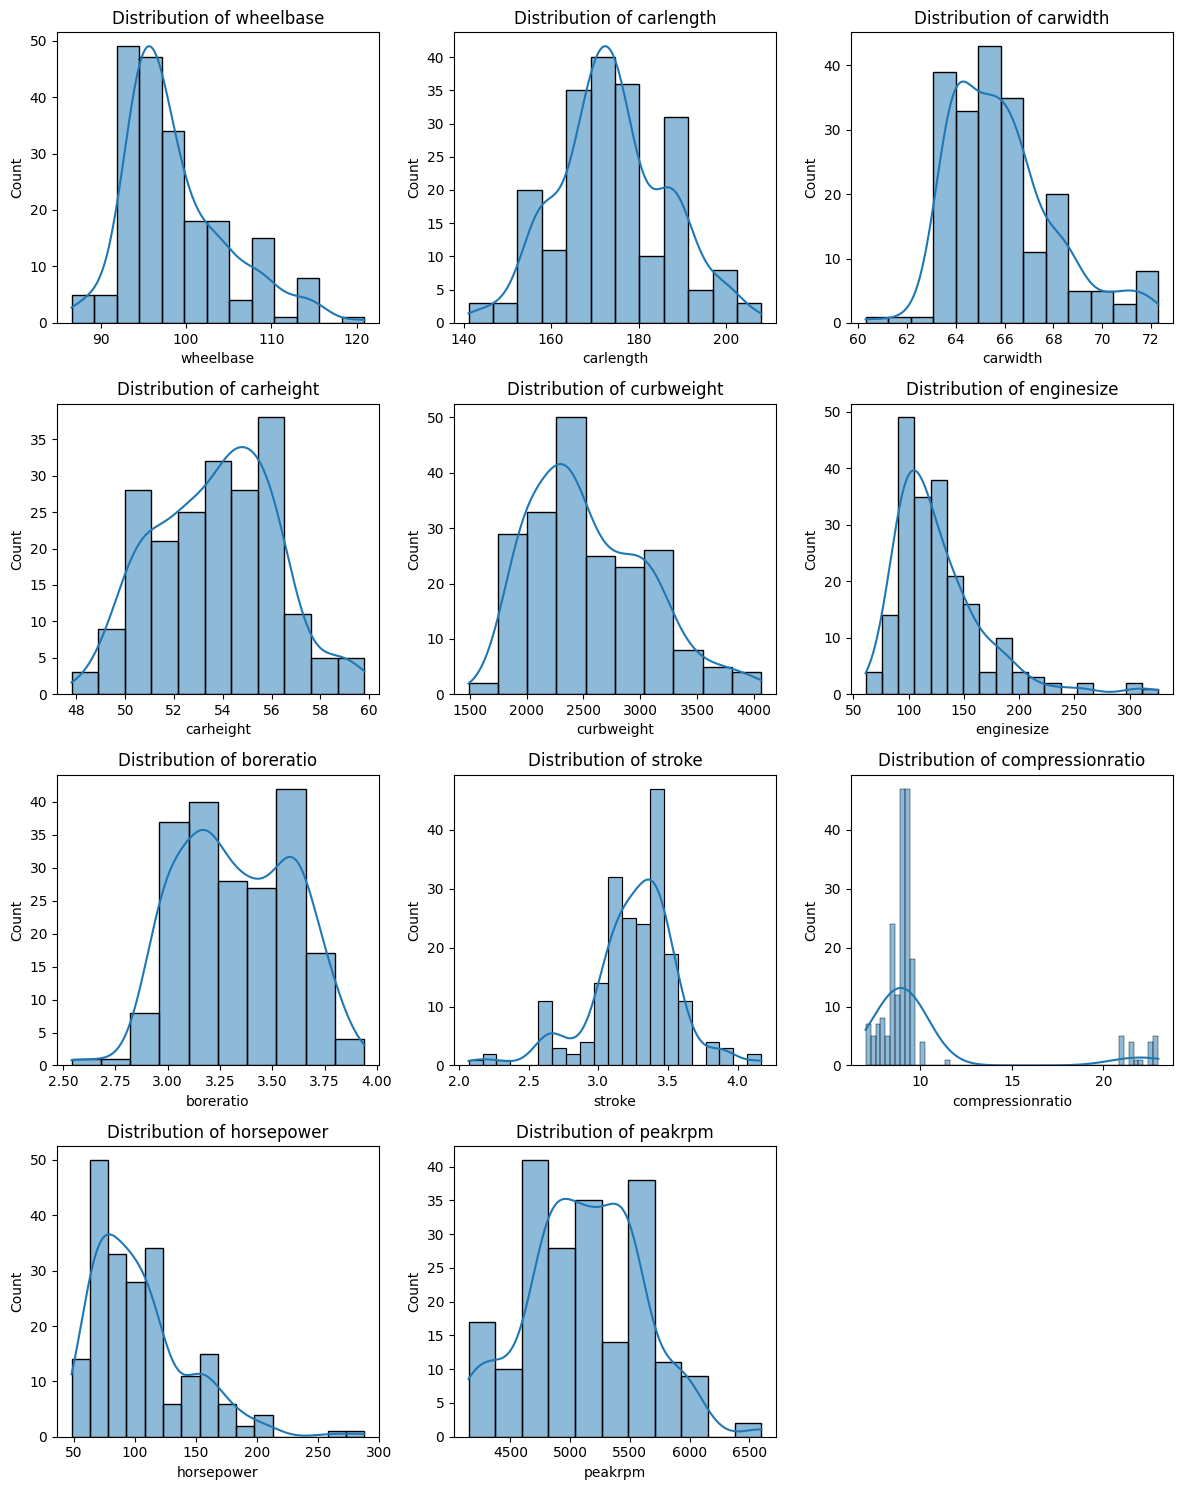

In [84]:
# Histograms for numerical variables
# Adjust the subplot grid to accommodate all columns
fig, axes = plt.subplots(4, 3, figsize=(12, 15))  # Create a 6x2 grid (12 subplots) to accommodate all numerical columns
# Flatten the axes array for easier iteration
axes = axes.flatten()
# Remove the last empty plot
for i, col in enumerate(num_cols):
    sns.histplot(data[col], ax=axes[i], kde=True)  # Use flattened axes
    axes[i].set_title(f'Distribution of {col}')

# Remove the last empty plot if num_cols is odd
if len(num_cols) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

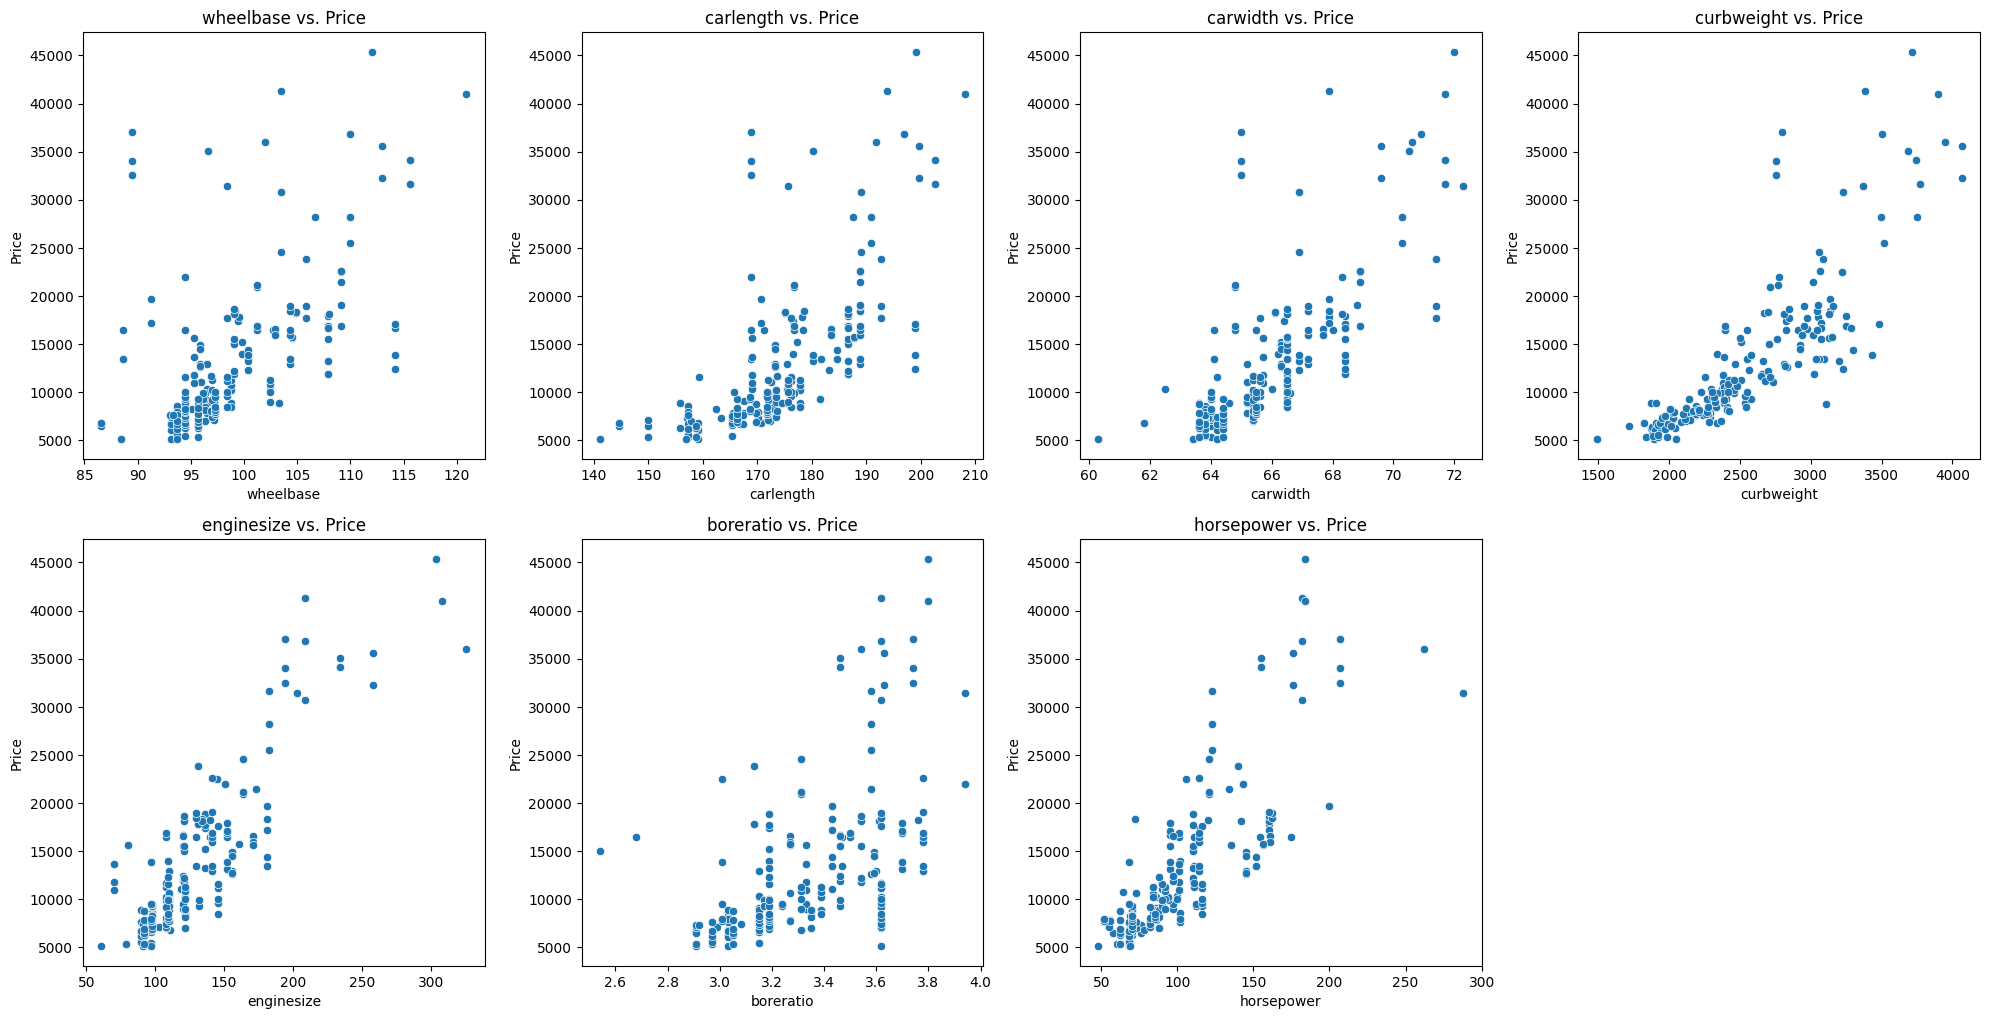

In [85]:
# Scatter plots for each numerical feature against price
plt.figure(figsize=(20, 20))
num_features = ['wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize', 'boreratio', 'horsepower']

# Loop through features
for idx, feature in enumerate(num_features):
    plt.subplot(4, 4, idx + 1)
    sns.scatterplot(x=data[feature], y=data['price'])
    plt.title(f'{feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

In [86]:
#correlation
correlation_matrix=data.corr()
correlation_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,...,-0.204037,-0.183195,0.166152,-0.081174,0.261182,-0.309492,0.145842,-0.120709,0.037803,-0.081174
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,...,-0.274413,-0.118320,0.244053,-0.057877,0.259894,-0.400210,0.262981,-0.187445,0.100413,-0.057877
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,...,-0.286211,-0.124446,0.348869,-0.013699,0.397690,-0.523135,0.209246,-0.183473,0.153516,-0.013699
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,...,0.036260,-0.046670,-0.065063,-0.238720,0.152982,0.059696,-0.049777,-0.015076,-0.170181,-0.238720
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,...,-0.413293,-0.080295,0.400878,-0.039196,0.264554,-0.576463,0.405490,-0.143903,0.187964,-0.039196
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,...,-0.363334,-0.016508,0.562403,-0.184762,0.144878,-0.631431,0.511783,-0.111081,0.335555,-0.184762
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,...,-0.410383,0.326798,0.119509,0.000127,-0.007797,-0.164076,0.128365,-0.108774,0.054482,0.000127
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,...,0.366084,-0.522808,-0.044813,-0.000187,0.176485,-0.111046,0.068388,-0.050450,-0.110878,-0.000187
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,...,0.027545,-0.084328,-0.086649,-0.026436,0.173360,-0.012522,-0.065559,-0.011354,0.023986,-0.026436
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,...,-0.427616,0.044752,0.431539,0.019250,0.110692,-0.639552,0.533544,-0.099600,0.280220,0.019250


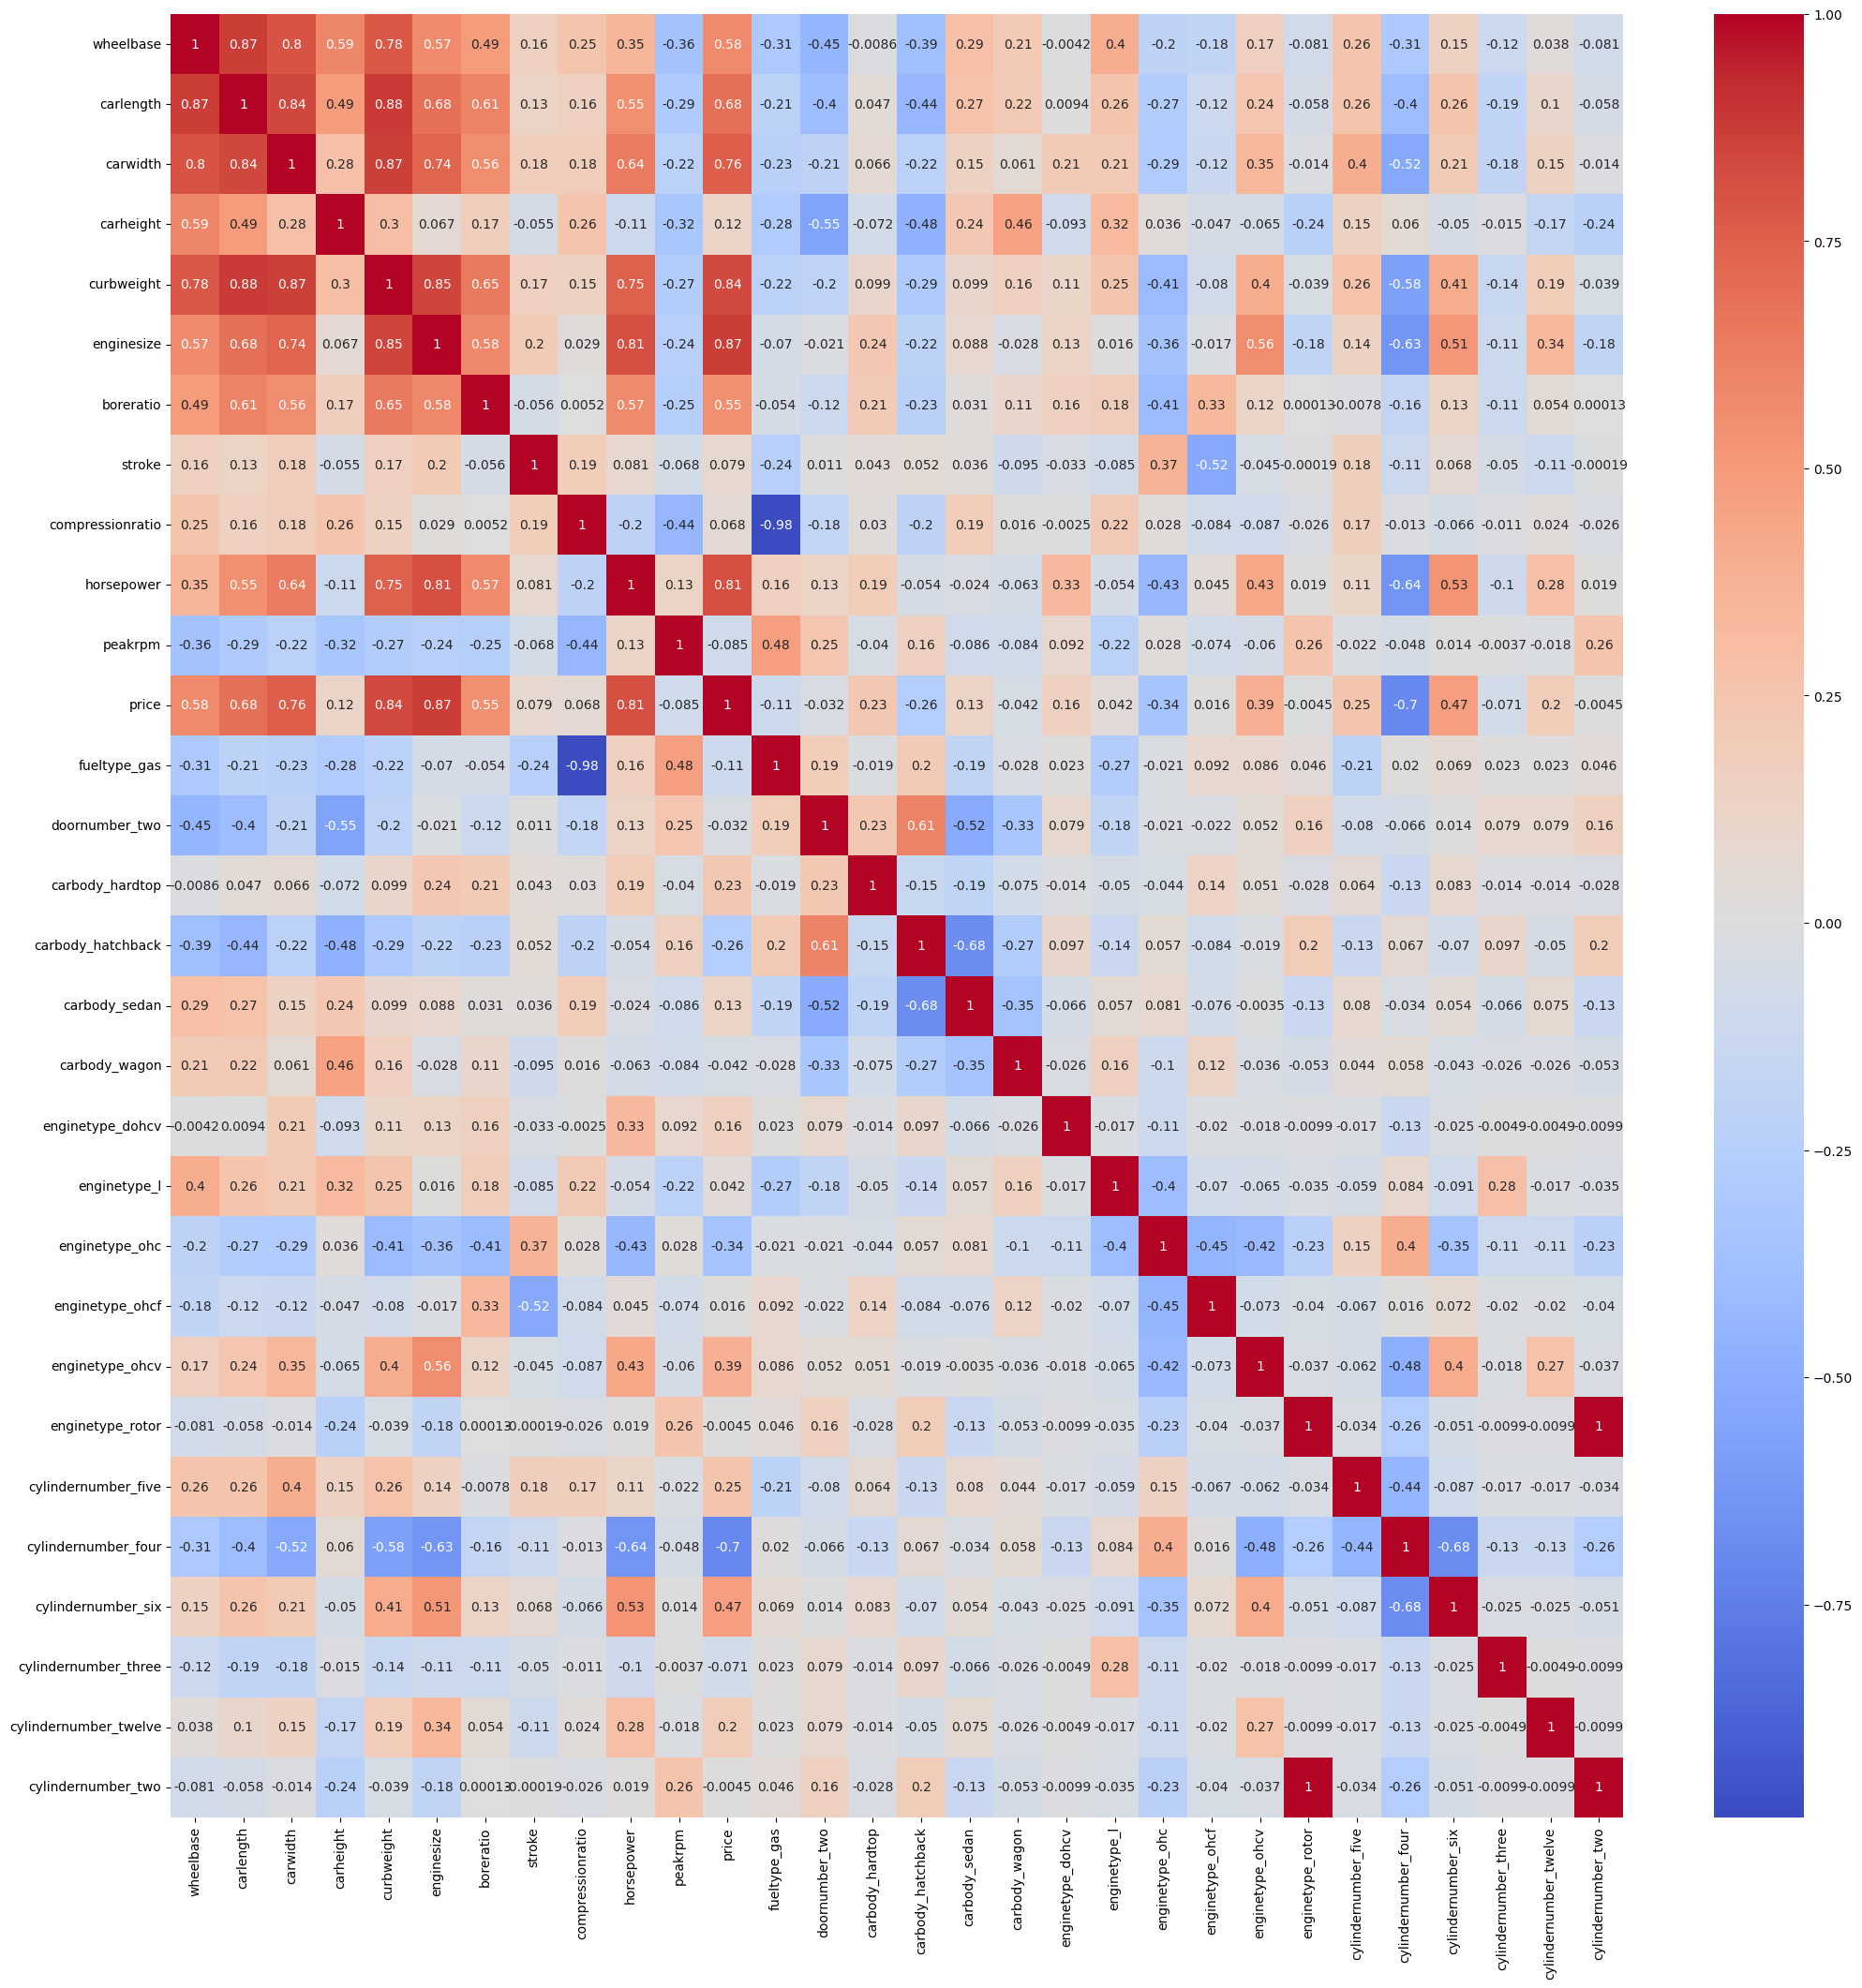

In [87]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [88]:
# Get the absolute correlations with 'price'
cor_target = correlation_matrix['price'].abs()

# Select features with correlation >= 0.5
relevant_features = cor_target[cor_target >= 0.5].index

# Filter the data
data_filtered = data[relevant_features]

# Display the remaining features
print("Selected Features:\n", data_filtered.columns)

# Check the shape
print(f"Original Shape: {data.shape}")
print(f"Filtered Shape: {data_filtered.shape}")

Selected Features:
 Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price', 'cylindernumber_four'],
      dtype='object')
Original Shape: (205, 30)
Filtered Shape: (205, 9)


In [89]:
data=data_filtered
data

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,cylindernumber_four
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,1
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,1
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,1
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,0
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,1
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,1
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,0
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,0


# **Data Preprocessing**

In [90]:
#Feature scaling
scaler = StandardScaler()
scaled_Features = scaler.fit_transform(data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower']])
scaled_data= pd.DataFrame(scaled_Features,columns= ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower'])

# Replace original features with their scaled versions
for col in scaled_data.columns:
    data[col] = scaled_data[col]

print(data.head())

   wheelbase  carlength  carwidth  curbweight  enginesize  boreratio  \
0  -1.690772  -0.426521 -0.844782   -0.014566    0.074449   0.519071   
1  -1.690772  -0.426521 -0.844782   -0.014566    0.074449   0.519071   
2  -0.708596  -0.231513 -0.190566    0.514882    0.604046  -2.404880   
3   0.173698   0.207256  0.136542   -0.420797   -0.431076  -0.517266   
4   0.107110   0.207256  0.230001    0.516807    0.218885  -0.517266   

   horsepower    price  cylindernumber_four  
0    0.174483  13495.0                    1  
1    0.174483  16500.0                    1  
2    1.264536  16500.0                    0  
3   -0.053668  13950.0                    1  
4    0.275883  17450.0                    0  


<ipython-input-90-58bc40350869>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = scaled_data[col]


In [91]:
# Move 'price' column to the last position
price = data.pop('price')   # Remove 'price' and store it
data['price'] = price       # Add it back at the end

# Split the data into features and labels
X = data.iloc[:, :-1].values  # Features (all columns except the last one)
y = data.iloc[:, -1].values   # Labels (the last column)

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (164, 8)
X_test shape: (41, 8)
y_train shape: (164,)
y_test shape: (41,)


<ipython-input-91-377d0b1808d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = price       # Add it back at the end


# **Simple Linear Regression**

In [92]:
# --- Simple Linear Regression ---
# Find most correlated feature with the target
correlations = data.corr().iloc[:-1, -1].abs()
most_corr_feature = correlations.idxmax()
print(f"\nMost correlated feature with target: {most_corr_feature}")

# Reshape for sklearn
X_simple = data[[most_corr_feature]]
X_simple_scaled = scaler.fit_transform(X_simple)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple_scaled, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)



Most correlated feature with target: enginesize


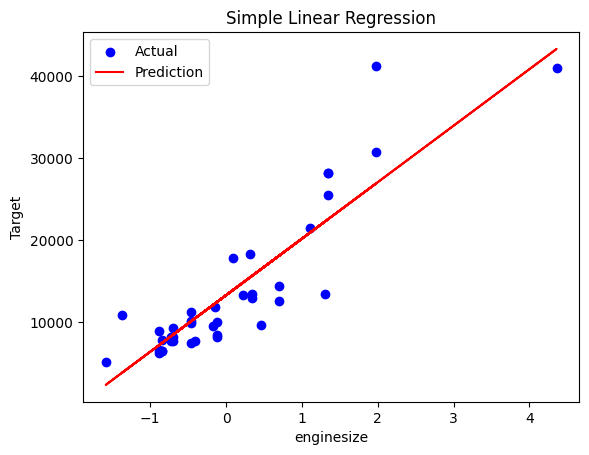

In [93]:
# Visualization
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Prediction')
plt.title('Simple Linear Regression')
plt.xlabel(most_corr_feature)
plt.ylabel('Target')
plt.legend()
plt.show()


In [94]:
# Metrics
print(f"Simple Linear Regression R²: {r2_score(y_test_s, y_pred_s):.4f}")
print(f"Simple Linear Regression MSE: {mean_squared_error(y_test_s, y_pred_s):.4f}")

Simple Linear Regression R²: 0.8041
Simple Linear Regression MSE: 15465458.9659


# **Multiple Linear Regression**

In [95]:
# --- Multiple Linear Regression ---
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred_m = model_multi.predict(X_test)

# Metrics
print(f"\nMultiple Linear Regression R²: {r2_score(y_test, y_pred_m):.4f}")
print(f"Multiple Linear Regression MSE: {mean_squared_error(y_test, y_pred_m):.4f}")



Multiple Linear Regression R²: 0.8523
Multiple Linear Regression MSE: 11663536.2142


# **Polynomial Regression**

In [96]:
# --- Polynomial Regression ---
degrees = [2, 3]
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_simple_scaled)
    X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    model_poly = LinearRegression()
    model_poly.fit(X_train_p, y_train_p)
    y_pred_p = model_poly.predict(X_test_p)

    print(f"\nPolynomial Regression (Degree {degree}) R²: {r2_score(y_test_p, y_pred_p):.4f}")
    print(f"Polynomial Regression (Degree {degree}) MSE: {mean_squared_error(y_test_p, y_pred_p):.4f}")




Polynomial Regression (Degree 2) R²: 0.8019
Polynomial Regression (Degree 2) MSE: 15637882.1920

Polynomial Regression (Degree 3) R²: 0.8528
Polynomial Regression (Degree 3) MSE: 11621389.4551


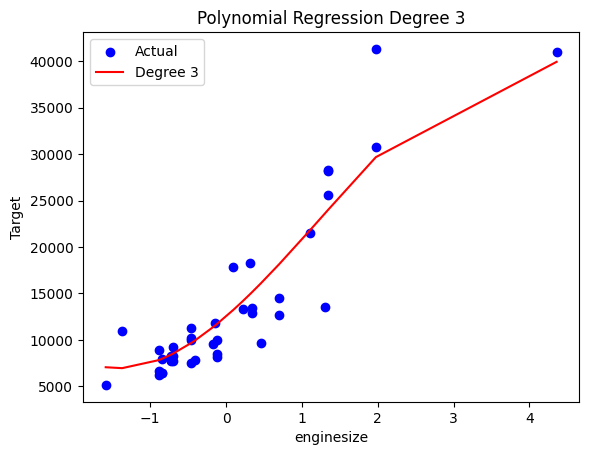

In [97]:
# Sort values for plotting
sorted_index = X_test_p[:, 1].argsort()
plt.scatter(X_test_p[:, 1], y_test_p, color='blue', label='Actual')
plt.plot(X_test_p[:, 1][sorted_index], y_pred_p[sorted_index], color='red', label=f'Degree {degree}')
plt.title(f'Polynomial Regression Degree {degree}')
plt.xlabel(most_corr_feature)
plt.ylabel('Target')
plt.legend()
plt.show()

# **Models Comparison**

In [98]:
# Collect Metrics
models = ['Simple Linear Regression', 'Multiple Linear Regression', 'Polynomial Regression (Deg 2)', 'Polynomial Regression (Deg 3)']
r2_scores = []
mse_scores = []

# Simple Linear
r2_scores.append(r2_score(y_test_s, y_pred_s))
mse_scores.append(mean_squared_error(y_test_s, y_pred_s))

# Multiple Linear
r2_scores.append(r2_score(y_test, y_pred_m))
mse_scores.append(mean_squared_error(y_test, y_pred_m))

# Polynomial Degree 2
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X_simple_scaled)
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(X_poly2, y, test_size=0.2, random_state=42)
model_poly2 = LinearRegression()
model_poly2.fit(X_train_p2, y_train_p2)
y_pred_p2 = model_poly2.predict(X_test_p2)

r2_scores.append(r2_score(y_test_p2, y_pred_p2))
mse_scores.append(mean_squared_error(y_test_p2, y_pred_p2))

# Polynomial Degree 3
poly3 = PolynomialFeatures(degree=3)
X_poly3 = poly3.fit_transform(X_simple_scaled)
X_train_p3, X_test_p3, y_train_p3, y_test_p3 = train_test_split(X_poly3, y, test_size=0.2, random_state=42)
model_poly3 = LinearRegression()
model_poly3.fit(X_train_p3, y_train_p3)
y_pred_p3 = model_poly3.predict(X_test_p3)

r2_scores.append(r2_score(y_test_p3, y_pred_p3))
mse_scores.append(mean_squared_error(y_test_p3, y_pred_p3))



<ipython-input-99-172850c08e2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='viridis')
<ipython-input-99-172850c08e2a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=mse_scores, palette='magma')


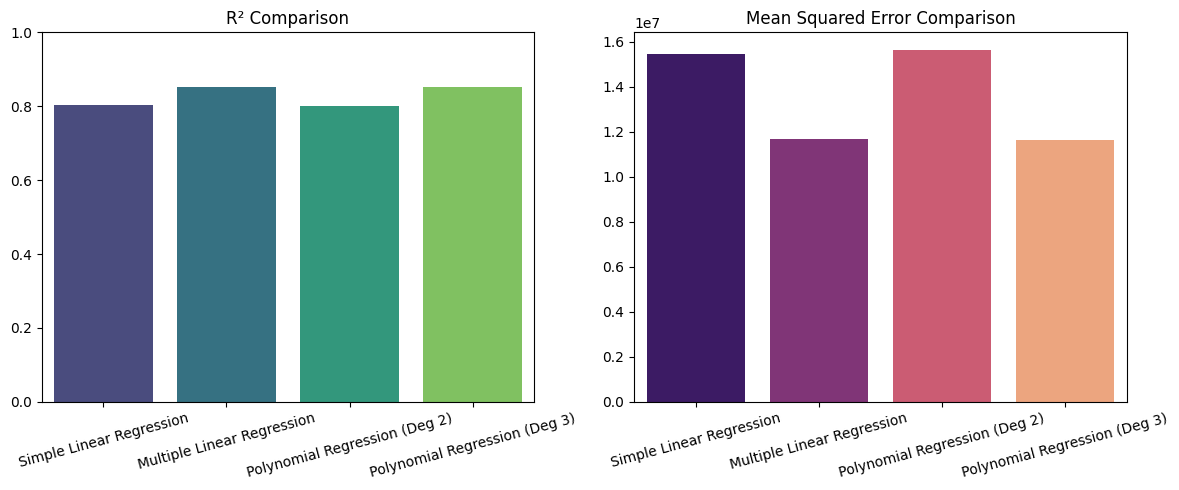

In [99]:
# Plot Metrics Comparison
plt.figure(figsize=(12, 5))

# R² Comparison
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title('R² Comparison')
plt.ylim(0, 1)  # Since R² is between 0 and 1
plt.xticks(rotation=15)

# MSE Comparison
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=mse_scores, palette='magma')
plt.title('Mean Squared Error Comparison')
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


In [100]:
# Print table for quick reference
comparison_df = pd.DataFrame({'Model': models,'R² Score': r2_scores,'   Mean Squared Error': mse_scores})
print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))



Model Performance Comparison:
                        Model  R² Score     Mean Squared Error
     Simple Linear Regression  0.804096           1.546546e+07
   Multiple Linear Regression  0.852256           1.166354e+07
Polynomial Regression (Deg 2)  0.801912           1.563788e+07
Polynomial Regression (Deg 3)  0.852789           1.162139e+07


# **Logistic Regression**

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# Load the dataset
df = pd.read_csv('/content/heart.csv')

# Display the first 5 rows to understand the structure
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [103]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [104]:
 # No missing values in this dataset
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


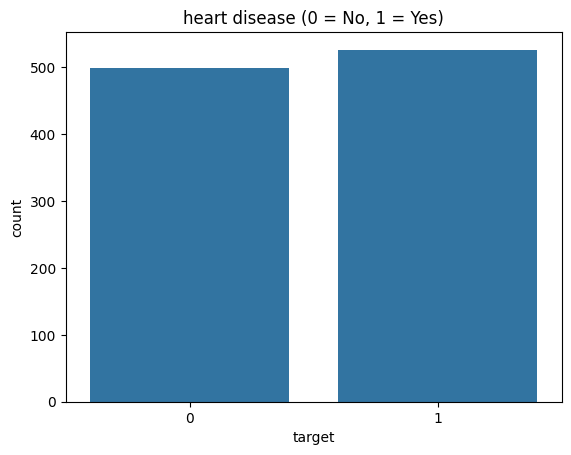

In [105]:
sns.countplot(x='target', data=df)
plt.title("heart disease (0 = No, 1 = Yes)")
plt.show()

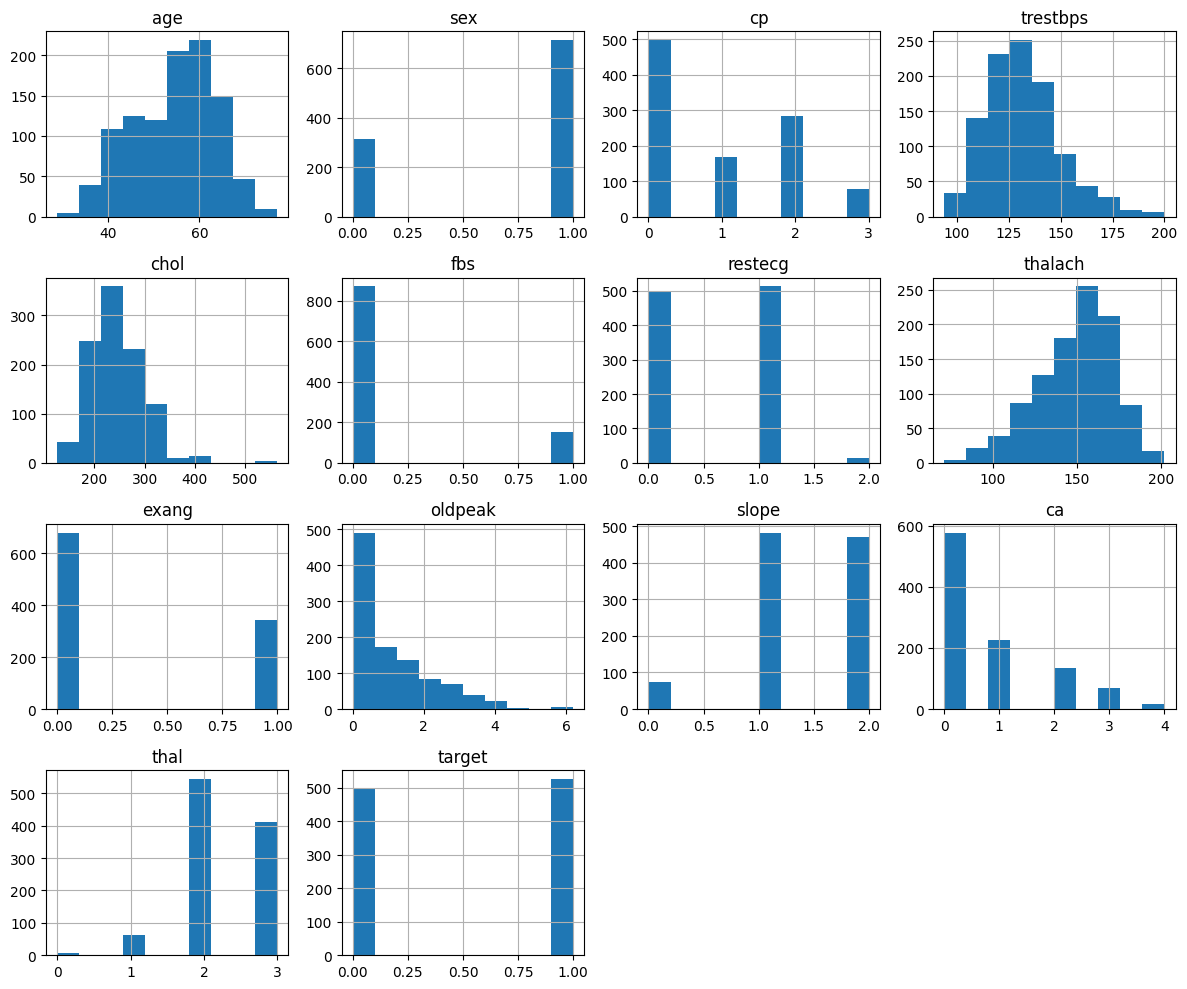

In [106]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [107]:
# Create a copy of the original data
df_encoded = df.copy()

# List of categorical columns to be encoded
categorical_cols = ['cp', 'restecg', 'slope', 'thal']

# Apply One-Hot Encoding and drop the first category to avoid multicollinearity(redundant)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Display the first 5 rows after encoding
print(df_encoded.head())

   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  target  cp_1  \
0   52    1       125   212    0      168      0      1.0   2       0     0   
1   53    1       140   203    1      155      1      3.1   0       0     0   
2   70    1       145   174    0      125      1      2.6   0       0     0   
3   61    1       148   203    0      161      0      0.0   1       0     0   
4   62    0       138   294    1      106      0      1.9   3       0     0   

   cp_2  cp_3  restecg_1  restecg_2  slope_1  slope_2  thal_1  thal_2  thal_3  
0     0     0          1          0        0        1       0       0       1  
1     0     0          0          0        0        0       0       0       1  
2     0     0          1          0        0        0       0       0       1  
3     0     0          1          0        0        1       0       0       1  
4     0     0          1          0        1        0       0       1       0  


In [108]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,0,0,0,1,0,0,1,0,0,1
1,53,1,140,203,1,155,1,3.1,0,0,0,0,0,0,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2.6,0,0,0,0,0,1,0,0,0,0,0,1
3,61,1,148,203,0,161,0,0.0,1,0,0,0,0,1,0,0,1,0,0,1
4,62,0,138,294,1,106,0,1.9,3,0,0,0,0,1,0,1,0,0,1,0


In [109]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


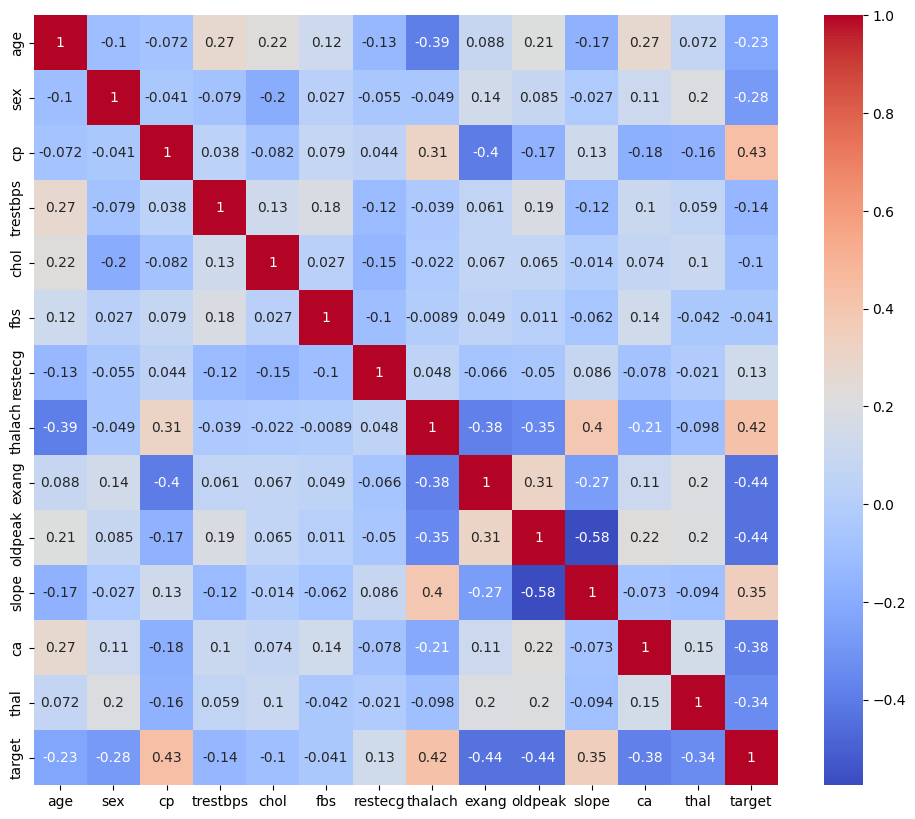

In [110]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [111]:
#Feature Scaling and Splitting the Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)
#print(y_pred)
# Model Evaluation - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


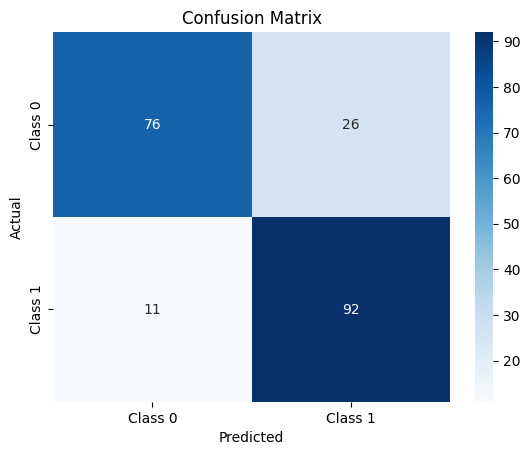

In [113]:
# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [114]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8195121951219512